<center><h1>Final Project</h1></center><br>
EMAT 22110 - Data in Emerging Media and Technology <br>
Author: Hannah Haswell <br>
Created: 4/26/21 <br>
Last Updated: 5/11/21

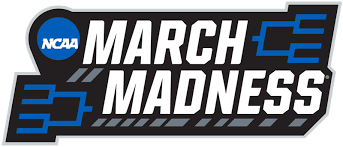

# Purpose

In this data report, I will be analyzing March Madness data from the teams that made it to the final four in the 2021 NCAA Tournament as well as those colleges admissions, graduation rate, size, and student demographics data. I chose this topic because I have plyed basketball all throughout high school and now that I am not actively playing I enjoy watching college basketball. I will show a variety of analyses and displays of data that we will be able to draw conclusions from about the final four March Madness teams, as well as their college data.

## 1. Overview

My <b>question</b> that I want to answer for this report is: What about a university makes their Men’s basketball team successful in March Madness?

To do this I will:
- Look at the colleges that made it to the Final Four in the March Madness 2021 tournament
    - UCLA
    - Gonzaga
    - Baylor
    - Houston
- Look at college data from those four colleges<br>
Including:<br>
        -admissions
        -graduation rate
        -size
        
Below, I am going to load in the libraries I will be using for this report and all the files of data I will be using with a short description.

In [4]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

<b>College Data</b><br>
Source: https://www.kaggle.com/yashgpt/us-college-data?select=College_Data.csv <br>
Content:<br>
    -Private A factor with levels No and Yes indicating private or public university<br>
    -Apps Number of applications received<br>
    -Accept Number of applications accepted<br>
    -Enroll Number of new students enrolled<br>
    -Top10perc Pct. new students from top 10% of H.S. class<br>
    -Top25perc Pct. new students from top 25% of H.S. class<br>
    -F.Undergrad Number of fulltime undergraduates<br>
    -P.Undergrad Number of parttime undergraduates<br>
    -Outstate Out-of-state tuition<br>
    -Room.Board Room and board costs<br>
    -Books Estimated book costs<br>
    -Personal Estimated personal spending<br>
    -PhD Pct. of faculty with Ph.D.’s<br>
    -Terminal Pct. of faculty with terminal degree<br>
    -S.F.Ratio Student/faculty ratio<br>
    -perc.alumni Pct. alumni who donate<br>
    -Expend Instructional expenditure per student<br>
    -Grad.Rate Graduation rate<br>
    
I added data from the common data sheets required by the university for Houston University and University of California, Los Angelos because they were not included in the orignal data set. I also deleted some of the fields in the original data set because they were not needed in this analyses.See the links for the common data sheets below.<br>
    UCLA 2019-2020: https://apb.ucla.edu/file/ebc786f9-0b15-4ec0-acda-3203ce9e3726 <br>
    Houston University 2020-2021: https://www.uh.edu/ir/reports/common-data-sets/ 

In [30]:
ColData = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\College_Data2.csv")
ColData.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Grad.Rate,Accept.Rate
0,Christendom College,Yes,81,72,51,33.0,71.0,139,3,8730,3600,400,800,58,NaN
1,Capitol College,Yes,100,90,35,10.0,52.0,282,331,8400,2812,300,2134,52,NaN
2,College of St. Joseph,Yes,141,118,55,12.0,21.0,201,173,8300,4850,450,1300,76,NaN
3,Wisconsin Lutheran College,Yes,152,128,75,17.0,41.0,282,22,9100,3700,500,1400,50,NaN
4,Saint Mary-of-the-Woods College,Yes,150,130,88,23.0,50.0,341,768,10300,4130,500,1700,75,NaN


<b>Men's College Basketball Stats 2021</b><br>
Source: https://sportsdata.io/developers/data-dictionary/ncaa-basketball?groups=50 <br>
Content:<br>
1. Base<br>
-Conference<br>
-Game<br>
-Period<br>
-Player<br>
-Season<br>
-Stadium<br>
-Team<br>
-Tournament<br>
2.Tier 1: Scores <br>
-Game<br>
-Period<br>
-Stadium<br>
3. Tier 2: Team Stats <br>
-TeamGame<br>
-TeamSeason<br>
4. Tier 3: Player Stats<br>
-BoxScore<br>
-Game<br>
-Period<br>
-PlayerGame<br>
-PlayerSeason<br>
-Stadium<br>
-TeamGame<br>

In [31]:
cbb21 = pd.read_csv(r"C:\Users\hhasw\Desktop\Junior Year\Data in Emerging Media and Technology\Final Project\cbb21.csv")
cbb21.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9,7.2,1.0
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7,8.9,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6,2.0


## 2. The Data

Below, I am pulling out the keys for each of my data sets so I can work with them throughout this report. By pulling out the keys for each data set, I found out that each data set has a type of object.

In [32]:
ColData.keys()

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'Grad.Rate', 'Accept.Rate'],
      dtype='object')

In [33]:
cbb21.keys()

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'SEED'],
      dtype='object')

## 3. Data Preparation

In [34]:
ColDatadf = pd.DataFrame(data = ColData)
ColDatadf

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Grad.Rate,Accept.Rate
0,Christendom College,Yes,81,72,51,33.0,71.0,139,3,8730,3600,400,800,58,NaN
1,Capitol College,Yes,100,90,35,10.0,52.0,282,331,8400,2812,300,2134,52,NaN
2,College of St. Joseph,Yes,141,118,55,12.0,21.0,201,173,8300,4850,450,1300,76,NaN
3,Wisconsin Lutheran College,Yes,152,128,75,17.0,41.0,282,22,9100,3700,500,1400,50,NaN
4,Saint Mary-of-the-Woods College,Yes,150,130,88,23.0,50.0,341,768,10300,4130,500,1700,75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,Michigan State University,No,18114,15096,6180,23.0,57.0,26640,4120,10658,3734,504,600,71,NaN
775,Houston University,No,28645,17986,4717,33.0,67.0,28984,10199,25831,9750,680,680,59,65.0
776,Purdue University at West Lafayette,No,21804,18744,5874,29.0,60.0,26213,4065,9556,3990,570,1060,67,NaN
777,Rutgers at New Brunswick,No,48094,26330,4520,36.0,79.0,21401,3712,7410,4748,690,2009,77,NaN


In [35]:
NEWColDatadf = ColDatadf[(ColDatadf["Unnamed: 0"] == 'Gonzaga University') | (ColDatadf["Unnamed: 0"] == 'Baylor University') | (ColDatadf["Unnamed: 0"] == 'Houston University') | (ColDatadf["Unnamed: 0"] == 'University of California, Los Angelos')]
NEWColDatadf

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Grad.Rate,Accept.Rate
467,Gonzaga University,Yes,1886,1524,526,31.0,67.0,2523,296,13000,4450,600,2400,69,61.7
712,Baylor University,Yes,6075,5349,2367,34.0,66.0,9919,484,6450,3920,600,1346,72,45.3
775,Houston University,No,28645,17986,4717,33.0,67.0,28984,10199,25831,9750,680,680,59,65.0
778,"University of California, Los Angelos",No,108831,13432,5900,NaN,NaN,30872,571,43188,16104,657,657,91,12.3


In [36]:
cbb21df = pd.DataFrame(data = cbb21)
cbb21df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,24.8,28.9,24.5,53.3,42.3,38.7,33.5,66.9,7.2,1.0
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,22.2,39.2,30.5,55.3,45.4,37.6,32.7,70.7,8.9,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,28.6,32.0,22.6,52.4,45.8,38.6,34.8,70.0,5.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Louisiana Tech,CUSA,27,21,102.7,93.4,0.7479,50.5,45.6,18.4,...,23.4,35.3,26.4,49.7,46.4,34.6,29.6,69.6,-1.7,NaN
343,Toledo,MAC,29,21,113.3,101.8,0.7743,54.3,48.3,15.5,...,30.7,28.5,23.4,52.5,51.0,37.7,29.5,69.1,-2.1,NaN
344,UAB,CUSA,27,22,102.5,94.6,0.7153,48.6,47.0,15.6,...,25.4,29.9,27.1,49.4,46.1,31.1,32.4,67.5,-2.7,NaN
345,Eastern Kentucky,OVC,27,22,101.5,102.3,0.4749,51.2,51.0,16.6,...,30.2,25.6,32.2,49.6,51.8,35.8,33.0,75.1,-3.8,NaN


In [37]:
NEWcbb21df = cbb21df[(cbb21df["TEAM"] == 'Gonzaga') | (cbb21df["TEAM"] == 'Baylor') | (cbb21df["TEAM"] == 'Houston') | (cbb21df["TEAM"] == 'UCLA')]
NEWcbb21df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,30.9,27.0,31.7,54.1,48.1,41.8,34.0,68.8,6.6,1.0
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,23.4,36.7,25.9,64.0,46.8,36.5,32.5,74.6,8.5,1.0
6,Houston,Amer,26,24,120.6,90.9,0.9626,51.3,42.9,16.3,...,28.0,30.7,42.4,49.9,43.0,35.5,28.5,65.0,4.0,2.0
43,UCLA,P12,26,17,112.3,97.5,0.8350,52.0,50.7,16.6,...,24.4,32.6,28.0,50.6,49.4,36.7,35.1,64.7,1.0,11.0


Below, I am calculating the win percentage by taking G (total amount of games played) divided by W (total amount of games won) and multipling it by 100 to get a percentage.

In [38]:
winpercent = NEWcbb21df['percent_win'] = (NEWcbb21df['W'] / NEWcbb21df['G']) * 100
winpercent

<ipython-input-38-bc7eb6ae9805>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winpercent = NEWcbb21df['percent_win'] = (NEWcbb21df['W'] / NEWcbb21df['G']) * 100


1      91.666667
3     100.000000
6      92.307692
43     65.384615
dtype: float64

Now, I am putting them in a dataframe to be displayed better.

In [39]:
winpercentdf = pd.DataFrame(data = winpercent, columns = ['Win Percentage'])
winpercentdf

,Win Percentage
1,91.666667
3,100.000000
6,92.307692
43,65.384615


Now we can see the winning percentage of each team above.<br>
Baylor = 91.7%<br>
Gonzaga = 100%<br>
Houston = 92.3%<br>
UCLA = 65.4% 

Below, I am making a smaller dataframe using only the columns I will be looking at in some of my visualizations later in the report.

In [40]:
NEWcbb21df2 = NEWcbb21df[['TEAM', 'G', 'W']]
NEWcbb21df2.head

<bound method NDFrame.head of        TEAM   G   W
1    Baylor  24  22
3   Gonzaga  26  26
6   Houston  26  24
43     UCLA  26  17>

In [41]:
NEWcbb21df3 = pd.DataFrame(data = NEWcbb21df2)
NEWcbb21df3

,TEAM,G,W
1,Baylor,24,22
3,Gonzaga,26,26
6,Houston,26,24
43,UCLA,26,17


Below, I am combining the NEWcbb21df3 dataframe with the winpercent dateframe.

In [42]:
results = pd.concat([NEWcbb21df3, winpercentdf], axis=1, join='inner')
display(results)

,TEAM,G,W,Win Percentage
1,Baylor,24,22,91.666667
3,Gonzaga,26,26,100.000000
6,Houston,26,24,92.307692
43,UCLA,26,17,65.384615


## 4. Data Visualization, Statistical Summaries and Analyses

Below, I am comparing the four teams winning percentages throughout the 2021 season. As you can see, Gonzaga's win percentage is the highest because they placed first in the tournamnet and UCLA had the lowest winning percentage even though they made it to the final four, their rank was 11.

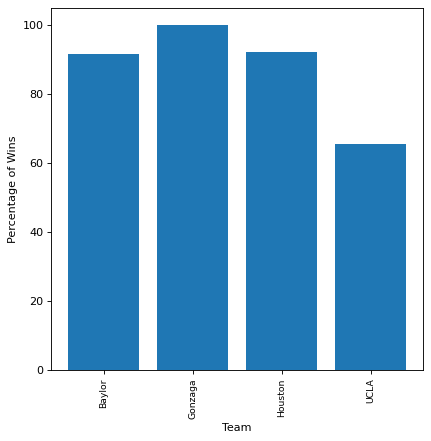

In [46]:
labels = results['TEAM']
vals = results['Win Percentage']
width = 1

fig, ax = plt.subplots(figsize=(6,6), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels,vals)
ax.set_xlabel("Team")
ax.set_ylabel("Percentage of Wins")
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

Below, I made a double bar graph to compare games won vs. games played. Although I calculated the win percentage with these two values, I thought it was interesting to see side by side.

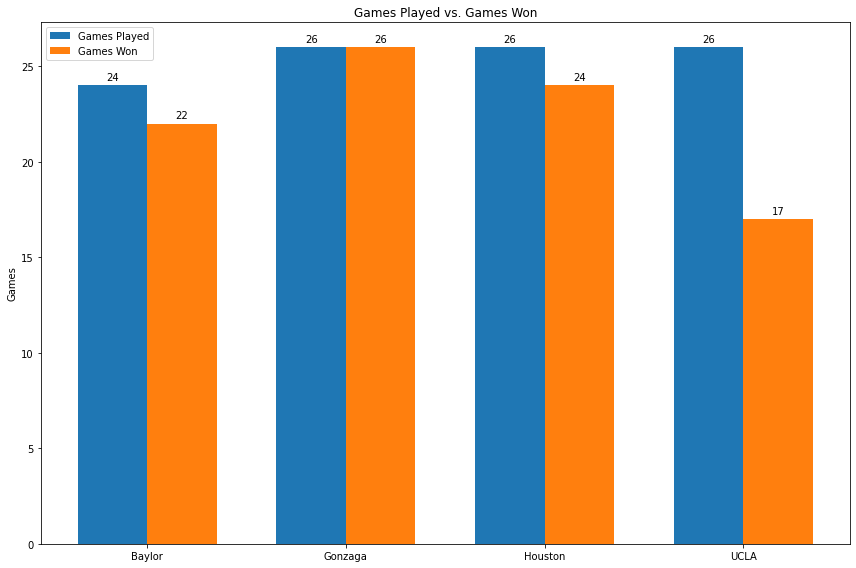

In [23]:
teams = results['TEAM']
games_played = results['G']
games_won = results['W']
x = np.arange(len(teams))
width = .35

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, games_played, width, label='Games Played')
rects2 = ax.bar(x + width/2, games_won, width, label='Games Won')

ax.set_ylabel('Games')
ax.set_title('Games Played vs. Games Won')
ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Below, I did another double bar graph to compare graduation rate vs. win percentage. It is interesting that the highest graduation rate also has the highest win percentage by Gonzaga. It is also interesting that Houston has the lowest graduation rate out of the four, but the second highest win percentage.

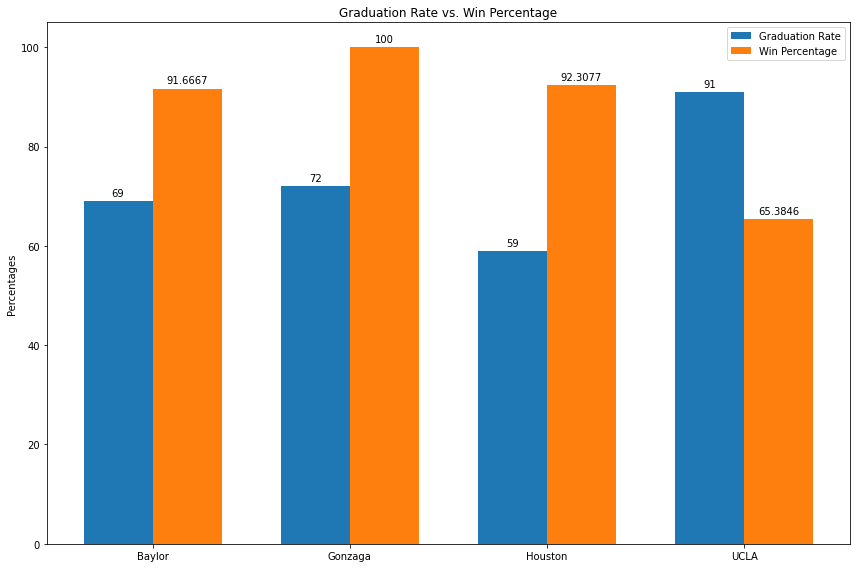

In [27]:
teams = results['TEAM']
grad_rate = NEWColDatadf['Grad.Rate']
percentwon = results['Win Percentage']
x = np.arange(len(teams))
width = .35

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, grad_rate, width, label='Graduation Rate')
rects2 = ax.bar(x + width/2, percentwon, width, label='Win Percentage')

ax.set_ylabel('Percentages')
ax.set_title('Graduation Rate vs. Win Percentage')
ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Below, I made two scatter plots with the data from above comparing the winning percentage vs graduation rate.

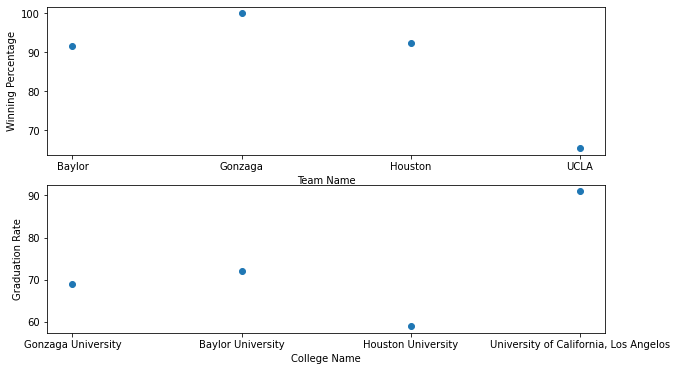

In [54]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = results['TEAM'], y = results['Win Percentage'])
ax[0].set_xlabel("Team Name")
ax[0].set_ylabel("Winning Percentage")

ax[1].scatter(x = NEWColDatadf['Unnamed: 0'], y = NEWColDatadf['Grad.Rate'])
ax[1].set_xlabel("College Name")
ax[1].set_ylabel("Graduation Rate")

plt.show()

Below, I did another double bar graph because I think these are really good at comparing multiple different percentages. For this one I am comparing acceptance rate vs win percentage. I pulled the acceptance rate from their colleges website because my data set did not have them. This shows how hard it is to get into that college vs how well their bassketball team is. Although I am sure many of the players grades get swayed for their athletic abilities. One thing I take away from this is that UCLA is the hardest school to get into out of the four and they also have the worst wining percentage. I can predict that maybe their studies sometimes come before basketball.

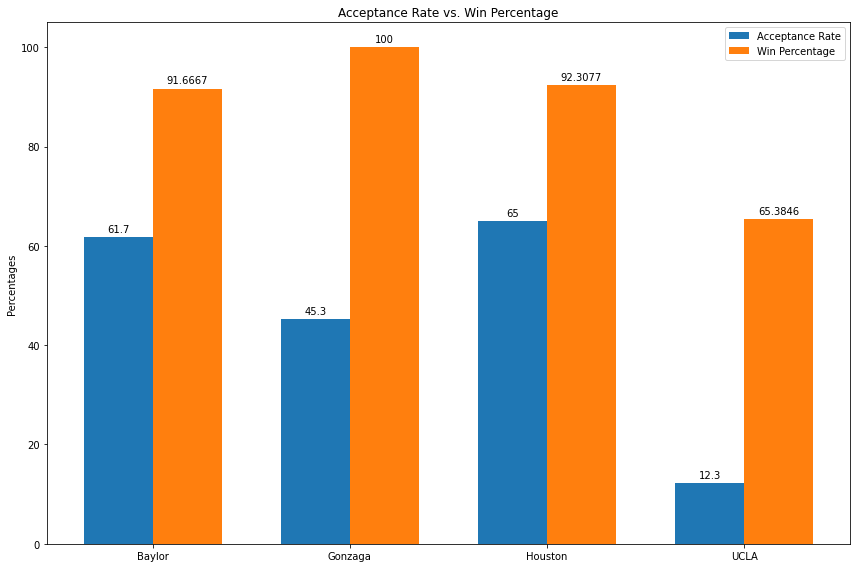

In [45]:
teams = results['TEAM']
accept_rate = NEWColDatadf['Accept.Rate']
percentwon = results['Win Percentage']
x = np.arange(len(teams))
width = .35

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, accept_rate, width, label='Acceptance Rate')
rects2 = ax.bar(x + width/2, percentwon, width, label='Win Percentage')

ax.set_ylabel('Percentages')
ax.set_title('Acceptance Rate vs. Win Percentage')
ax.set_xticks(x)
ax.set_xticklabels(teams)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Below, I made two scatter plots with the data from above comparing the winning percentage vs acceptance rate.

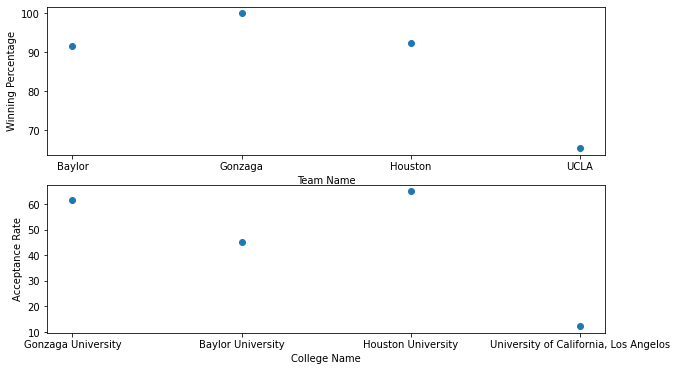

In [52]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = results['TEAM'], y = results['Win Percentage'])
ax[0].set_xlabel("Team Name")
ax[0].set_ylabel("Winning Percentage")

ax[1].scatter(x = NEWColDatadf['Unnamed: 0'], y = NEWColDatadf['Accept.Rate'])
ax[1].set_xlabel("College Name")
ax[1].set_ylabel("Acceptance Rate")

plt.show()

## 5. Conclusions

In conclusion, this project was very challenging yet rewarding because I did get to see some different trends between basketball data and college data. Throughout this report, I was trying to answer my driving question I stated at the beginning of this report. The question I wanted to answer was, "What about a university makes their Men’s basketball team successful in March Madness?" Looking back at my visualizations I have a few conclusions about how the graduation rate and acceptance rate are things that factor into a team winning in there college basketball season. I think that academics have a lot to do with how the team performs. Whether it be admissions or graduation rate, both show how much work and effort students put in to get into the college and graduate. The most interesting college to me during this report was UCLA. If you look at the visualizations for that school/team, you can see that they have the lowest acceptance rate, meaning its super hard to get into, and the highest graduation rate. On the basketball side of things, their winning percentage for season 2021 was the lowest of the four teams. This makes me think that the more prestigious the university is, the worse their basketball team is. Now this is not always true, but from my findings it seems that UCLA players may focus more on their academics than athletics.

## 6. Limitations, Alternative Approaches, and Next Steps

Some limitations that I ran into were finding March Madness 2021 tournament data. I had data from the past years but since the tournament just ended in March, a lot was not out from it. Thankfully, there was college mens basketball data for season 2021. Another limitation I had was how to compare college data to basketball data. This was harder than I thought it was going to be and resulted in only bar graphs and scatter plots, but I think they both show off what I was trying to display very well. I am glad that my visualizations came out well and make sense, but in the future I would have liked to have shown some different visualizations to get my point across. 